In [1]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score as f1_scorer
import corpus as corpus_class
corpus = corpus_class.load_from_file()
from numpy.random import randint as RandInt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.classification import UndefinedMetricWarning
import pandas as pd

from transform import RandForestPS

import warnings
warnings.simplefilter("ignore", np.VisibleDeprecationWarning)
warnings.simplefilter("ignore", UndefinedMetricWarning)

In [2]:
from os import listdir
import pickle

ESTIMATORS = []
for f in listdir("best_estimators"):
    with open("best_estimators/"+f, 'rb') as file:
        ESTIMATORS += [ ( f[:-4], pickle.load(file) ) ]
CLFS = [clf for _, clf in ESTIMATORS]

In [33]:
(X_tr, y_tr), (X_te, y_te) = corpus.simple_split(1/6)

In [34]:
bcf = VotingClassifier(estimators=ESTIMATORS, voting='hard') 
bcf.fit(X_tr, y_tr)
bcf.score(X_te, y_te), f1_scorer(bcf.predict( X_te ), y_te, average="macro")

(0.60121898127993034, 0.55005467053455381)

In [57]:
final_clf = RandForestPS(CLFS, 
                         n_folds=8, 
                         n_estimators=30, 
                         max_features=10,
                         max_depth=None,
                         min_samples_leaf=10, 
                         min_samples_split=10)
BEST_RF.fit( X_tr, y_tr )

In [58]:
BEST_RF.score( X_te, y_te ), f1_scorer(BEST_RF.predict( X_te ), y_te, average="macro")

(0.6068785372224641, 0.55486873628343636)

# Cross Validation

In [48]:
from scipy.stats import randint as RandInt
from sklearn.model_selection import GridSearchCV

In [53]:
RF = RandForestPS(estimators=CLFS, n_folds=6)

RF_PARAMS = {
    "n_estimators": [30],
    "max_depth": [None],
    "max_features": [1, 2, 5, 6, 7, 10, 15],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 5, 10, 15]
}

RF_CV = GridSearchCV(RF, RF_PARAMS,
                           scoring='f1_macro', fit_params=None, n_jobs=-1, 
                           iid=False, refit=True, cv=6, verbose=0, 
                           pre_dispatch='2*n_jobs',
                           error_score='raise', return_train_score=True)

In [54]:
RF_CV.fit(corpus.X_all, corpus.y)

GridSearchCV(cv=6, error_score='raise',
       estimator=<transform.RandForestPS object at 0x7fbeed46c2e8>,
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [30], 'max_features': [1, 2, 5, 6, 7, 10, 15], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5, 10, 15], 'max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=0)

In [55]:
BEST_RF = RF_CV.best_estimator_

In [56]:
df = pd.DataFrame(RF_CV.cv_results_).sort_values('mean_test_score',ascending=False)
df.columns
df[['mean_test_score',
    'param_max_features',
    'param_max_depth',
    "param_min_samples_split",
    'param_min_samples_leaf',
    'param_n_estimators']]

,mean_test_score,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_n_estimators
114,0.563871,10,None,10,10,30
132,0.563343,15,None,2,10,30
115,0.563065,10,None,15,10,30
90,0.563064,7,None,10,5,30
136,0.562787,15,None,2,15,30
127,0.562640,15,None,15,2,30
88,0.562155,7,None,2,5,30
103,0.562114,10,None,15,1,30
139,0.561942,15,None,15,15,30
71,0.561869,6,None,15,5,30


## 2. round for n_estimators

In [101]:
RF = RandForestPS(estimators=CLFS, n_folds=6)

RF_PARAMS_2 = {
    "n_estimators": [5000],
    "max_depth": [None],
    "max_features": [10],
    "min_samples_split": [10],
    "min_samples_leaf": [10]
}

RF_CV_2 = GridSearchCV(RF, RF_PARAMS_2,
                           scoring='f1_macro', fit_params=None, n_jobs=-1, 
                           iid=False, refit=True, cv=6, verbose=0, 
                           pre_dispatch='2*n_jobs',
                           error_score='raise', return_train_score=True)

In [102]:
RF_CV_2.fit(corpus.X_all, corpus.y)

GridSearchCV(cv=6, error_score='raise',
       estimator=<transform.RandForestPS object at 0x7fbedcf73898>,
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [5000], 'max_features': [10], 'min_samples_split': [10], 'min_samples_leaf': [10], 'max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=0)

In [103]:
df_OUT = pd.DataFrame(RF_CV_2.cv_results_).sort_values('mean_test_score',ascending=False)

In [127]:
df[['mean_test_score',
    'param_max_features',
    'param_max_depth',
    "param_min_samples_split",
    'param_min_samples_leaf',
    'param_n_estimators']].sort_values('mean_test_score',ascending=False)

,mean_test_score,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_n_estimators
10,0.564369,10,None,10,10,5000
4,0.564282,10,None,10,10,600
5,0.563133,10,None,10,10,75
6,0.563039,10,None,10,10,1200
7,0.562685,10,None,10,10,300
8,0.562358,10,None,10,10,2400
9,0.561095,10,None,10,10,150
0,0.559016,10,None,10,10,35
1,0.557297,10,None,10,10,20
2,0.551661,10,None,10,10,10


In [104]:
df = pd.concat([df_LOWER, df_UPPER, df_OUT], ignore_index=True)

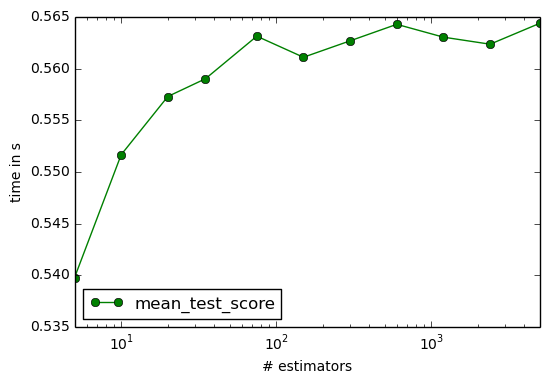

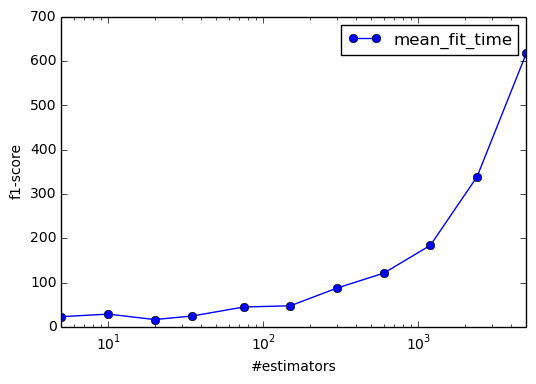

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()

df.sort_values('param_n_estimators', ascending=True)\
.plot(x='param_n_estimators', y='mean_test_score', logx=True, marker='o', color='g')
plt.ylabel('time in s')
plt.xlabel('# estimators')


df.sort_values('param_n_estimators', ascending=True)\
.plot(x='param_n_estimators', y='mean_fit_time', logx=True, marker='o', color='b')

plt.ylabel('f1-score')
plt.xlabel('#estimators')

In [107]:
df.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_max_features',
       'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score',
       'split0_train_score', 'split1_test_score', 'split1_train_score',
       'split2_test_score', 'split2_train_score', 'split3_test_score',
       'split3_train_score', 'split4_test_score', 'split4_train_score',
       'split5_test_score', 'split5_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

# Wilcoxen

In [145]:
from scipy.stats import wilcoxon

def wilcoxon_cv(corpus, clf1, clf2, n_samples=20):
    f1 = {1: [], 2: []}
    for i in range(n_samples):
        (X_tr, y_tr), (X_te, y_te) = corpus.simple_split(1/6)
        
        for clf, i in zip([clf1, clf2], [1,2]):
            clf.fit(X_tr, y_tr)
            y_pred = clf.predict(X_te)
            f1[i] += [ f1_scorer(y_te, y_pred, average="macro") ]
    
    w = wilcoxon(f1[1], f1[2])
    return w, f1[1], f1[2]

In [146]:
FINAL = RandForestPS(CLFS, 
                         n_folds=8, 
                         n_estimators=75, 
                         max_features=10,
                         max_depth=None,
                         min_samples_leaf=10, 
                         min_samples_split=10)
VOTING = VotingClassifier(estimators=ESTIMATORS, voting='hard') 

In [148]:
wilcoxon_cv(corpus, FINAL, VOTING, n_samples=20)

(WilcoxonResult(statistic=12.0, pvalue=0.00051671512385675217),
 [0.54504221611742398,
  0.58395308106427302,
  0.56707123527522907,
  0.57600181348876001,
  0.57222367302577382,
  0.5610129254394286,
  0.57928529884155056,
  0.57068654480653613,
  0.56702462730363412,
  0.55994969079762558,
  0.57419509604722507,
  0.5399728487305302,
  0.58248699863410003,
  0.5785681919516471,
  0.57001295982312838,
  0.56202846548740137,
  0.55788493770685432,
  0.56387608104772569,
  0.58757408470705752,
  0.54742817035886993],
 [0.53691175575661643,
  0.56514599109717445,
  0.54398684421204746,
  0.57413488817501368,
  0.55690019759871123,
  0.5573072701470404,
  0.57265336687651924,
  0.55318481080048965,
  0.55917082415987107,
  0.55772440146770097,
  0.57045404445922288,
  0.54785827305062162,
  0.55677147675911531,
  0.57744040720903167,
  0.55825590057927699,
  0.55158149470456808,
  0.54891568702165094,
  0.54864244711113874,
  0.57642040003107353,
  0.54943799483832112])

In [149]:
w, f1_1, f1_2 = Out[148]

In [151]:
np.array(f1_1).mean()

0.56731394703273863

In [152]:
np.array(f1_2).mean()

0.55814492380276026

NameError: name 'sigma' is not defined

In [154]:
from os import listdir
import pickle

ESTIMATORS = []
for f in listdir("best_estimators"):
    with open("best_estimators/"+f, 'rb') as file:
        ESTIMATORS += [ ( f[:-4], pickle.load(file) ) ]
CLFS = [clf for _, clf in ESTIMATORS]

FINAL = RandForestPS(CLFS, 
                         n_folds=8, 
                         n_estimators=75, 
                         max_features=10,
                         max_depth=None,
                         min_samples_leaf=10, 
                         min_samples_split=10)